In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [5]:
data = pd.read_csv('car data.csv')
df = data[['Transmission', 'Car_Name', 'Fuel_Type', 'Seller_Type']]

d = pd.get_dummies(data, columns=['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
print(data)

scaler = StandardScaler()
data[['Year', 'Present_Price', 'Kms_Driven']] = scaler.fit_transform(data[['Year', 'Present_Price', 'Kms_Driven']])

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [6]:
X = d.drop(['Selling_Price'], axis=1)  # Features (everything except Selling_Price)
y = d['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (240, 105), X_test shape: (61, 105)


# **Train the model**

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.5871639344262295


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

car_name = 'swift'
year = 2023
present_price = 9
kms_driven = 1000

sample_input = pd.DataFrame(data=[[car_name, year, present_price, kms_driven]],
                           columns=['Car_Name', 'Year', 'Present_Price', 'Kms_Driven'])

numerical_features = ['Year', 'Present_Price', 'Kms_Driven']

sample_input[numerical_features] = scaler.transform(sample_input[numerical_features])

print("Scaled sample input:")
print(sample_input)

sample_input_encoded = pd.get_dummies(sample_input, columns=['Car_Name'], drop_first=True)

missing_cols = set(X_train.columns) - set(sample_input_encoded.columns)
for col in missing_cols:
    sample_input_encoded[col] = 0

sample_input_encoded = sample_input_encoded[X_train.columns]

print("Encoded sample input:")
print(sample_input_encoded)

predicted_price = model.predict(sample_input_encoded)
print(f"Predicted price for {car_name} ({year}, {kms_driven} kms): {predicted_price[0]}")

Scaled sample input:
  Car_Name      Year  Present_Price  Kms_Driven
0    swift  3.246593        0.15893   -0.925944
Encoded sample input:
       Year  Present_Price  Kms_Driven  Owner  Car_Name_Activa 3g  \
0  3.246593        0.15893   -0.925944      0                   0   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                   0                       0                           0   

   Car_Name_Bajaj Avenger 150 street  Car_Name_Bajaj Avenger 220  ...  \
0                                  0                           0  ...   

   Car_Name_swift  Car_Name_sx4  Car_Name_verna  Car_Name_vitara brezza  \
0               0             0               0                       0   

   Car_Name_wagon r  Car_Name_xcent  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0                 0               0                 0                 0   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    0  

[1 rows x 105 colum

<ipython-input-21-53c52c37bd59>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_input_encoded[col] = 0
<ipython-input-21-53c52c37bd59>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_input_encoded[col] = 0
<ipython-input-21-53c52c37bd59>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

# Graph

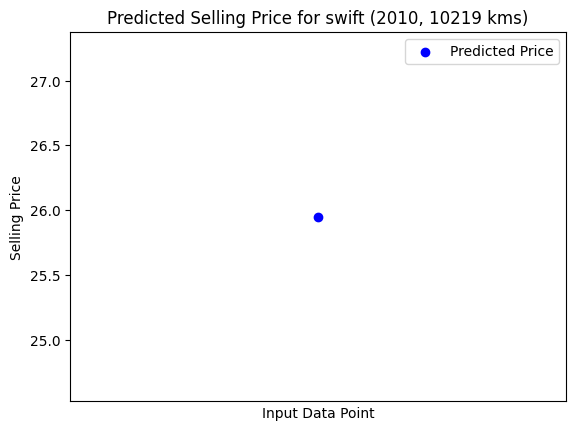

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(sample_input_encoded)

# Create a dummy x-axis
x_axis = [1]  # Single point for the x-axis

plt.scatter(x_axis, y_pred, color='blue', marker='o', label='Predicted Price')

plt.xlabel("Input Data Point")  # You can change this label
plt.ylabel("Selling Price")
plt.title(f"Predicted Selling Price for {car_name} ({year}, {kms_driven} kms)")

# Remove x-axis ticks and labels for clarity
plt.xticks([])

plt.legend()  # Show legend
plt.show()